Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor as LOF
from data_preparation import get_data

In [2]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ANOM_2
## OCSVM

In [3]:
anom = elec[elec.io_id == '612ca610bdd0fcc66ed23613'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 39402
before = 2
after = 4

In [4]:
anom.loc[ind - 730 * before + 10 * 3 + 6:ind + 720 * after]

,event_timestamp,io_id,Urms,Irms,P,AP_energy,RP_energy,S_energy,NP_energy,Total_P,...,S_energy_max,NP_energy_max,Total_P_max,Total_AP_energy_max,Total_RP_energy_max,Total_S_energy_max,Total_NP_energy_max,Phase_angle_max,Voltage_angle_max,Frequency_max
37978,2021-11-20 00:09:04,612ca610bdd0fcc66ed23613,"[231.193,234.606,243.474]","[0.2,0.2,0.3]","[5.050000000000001,4.585,2.935]","[3912.722885,3979.249385,4109.76156]","[0.72709,10.39609,0.028]",[],[],12.57,...,[],[],14.01,12001.73404,11.15118,\N,\N,"[-81,-83.9,-85.6]","[0,-121.6,120.1]",49.98
37979,2021-11-20 00:11:04,612ca610bdd0fcc66ed23613,"[232.681,236.653,241.762]","[0.2,0.25,0.25]","[7.4,3.455,0.9849999999999999]","[3912.7230849999996,3979.2495200000003,4109.76...","[0.72709,10.39609,0.028]",[],[],11.84,...,[],[],16.99,12001.73444,11.15118,\N,\N,"[-74.7,-84.7,-86.3]","[0,-121.3,120.4]",50.0
37980,2021-11-20 00:13:04,612ca610bdd0fcc66ed23613,"[230.705,236.429,242.44]","[0.2,0.25,0.25]","[7.9350000000000005,3.62,0.4850000000000001]","[3912.723325,3979.24964,4109.761675]","[0.72709,10.39609,0.028]",[],[],12.04,...,[],[],17.61,12001.73484,11.15118,\N,\N,"[-73.2,-84.4,-86.4]","[0,-121.6,120.3]",49.97
37981,2021-11-20 00:15:04,612ca610bdd0fcc66ed23613,"[231.272,237.293,240.545]","[0.2,0.2,0.25]","[6.34,4.31,2.005]","[3912.7235499999997,3979.249775,4109.761725]","[0.72709,10.39609,0.028]",[],[],12.655,...,[],[],14.82,12001.73526,11.15118,\N,\N,"[-78.4,-84.1,-87.2]","[0,-120.9,120.3]",49.97
37982,2021-11-20 00:17:04,612ca610bdd0fcc66ed23613,"[234.505,234.86,239.79]","[0.2,0.2,0.3]","[5.99,4.175,2.745]","[3912.72375,3979.24992,4109.761805]","[0.72709,10.39609,0.028]",[],[],12.91,...,[],[],15.32,12001.73569,11.15118,\N,\N,"[-79.9,-84.5,-85.6]","[0,-120.5,119.9]",49.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42278,2021-11-25 23:58:46,612ca610bdd0fcc66ed23613,"[226.722,232.565,241.625]","[0.2,0.25,0.2]","[8.82,4.59,-0.6799999999999999]","[4767.217334999999,4838.272155,5003.16726]","[0.78009,11.21087,0.08725]",[],[],12.73,...,[],[],15.67,14608.65698,12.078209999999999,\N,\N,"[-72.5,-85,-89.8]","[0,-122.7,119.7]",49.99
42279,2021-11-26 00:00:46,612ca610bdd0fcc66ed23613,"[225.775,233.453,243.037]","[0.2,0.3,0.2]","[9.27,5.13,-2.0949999999999998]","[4767.217645000001,4838.272315,5003.16726]","[0.78009,11.21087,0.08725]",[],[],12.305,...,[],[],13.7,14608.65746,12.078209999999999,\N,\N,"[-72.5,-84.1,-91.8]","[0,-123.4,119.6]",49.97
42280,2021-11-26 00:02:46,612ca610bdd0fcc66ed23613,"[225.232,233.335,243.095]","[0.2,0.25,0.2]","[8.184999999999999,4.96,-0.54]","[4767.21794,4838.27248,5003.16726]","[0.78009,11.21087,0.08725]",[],[],12.605,...,[],[],16.61,14608.6579,12.078209999999999,\N,\N,"[-72.1,-83,-88.8]","[0,-123.2,120.1]",49.98
42281,2021-11-26 00:04:46,612ca610bdd0fcc66ed23613,"[225.553,234.179,241.847]","[0.2,0.25,0.2]","[8.205,4.625,-1.275]","[4767.218225,4838.272645,5003.16726]","[0.78009,11.21087,0.08725]",[],[],11.555,...,[],[],15.01,14608.65836,12.078209999999999,\N,\N,"[-70.8,-83.7,-90]","[0,-123.2,120]",49.98


### Оригинальные данные, одна размерность, без EMD
Трейн на всех

In [5]:
n_neigh = 10

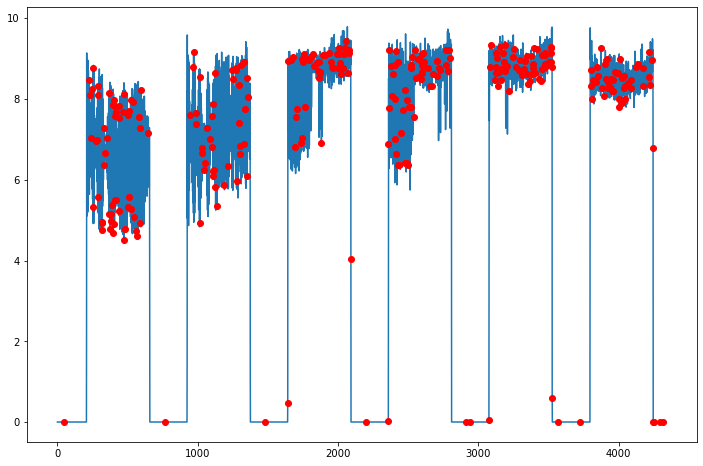

In [10]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

model = LOF(n_neighbors=3) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)
plt.plot(np.arange(len(df)), df, zorder=0)


### Оригинальные данные, одна размерность, с EMD
Трейн на всех

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


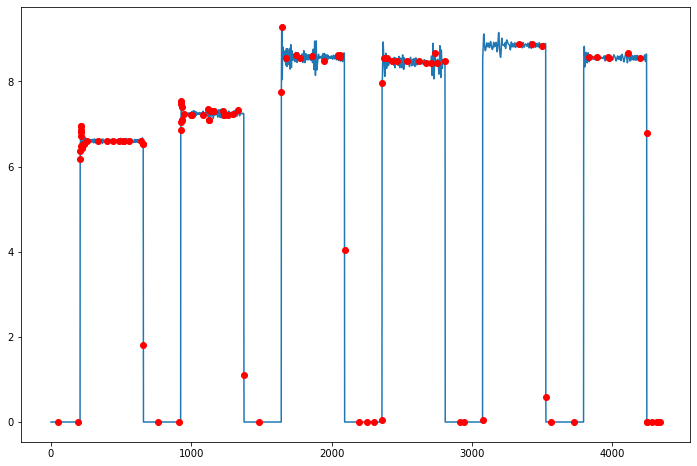

In [14]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=7)  
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)
plt.plot(np.arange(len(df)), df, zorder=0)

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

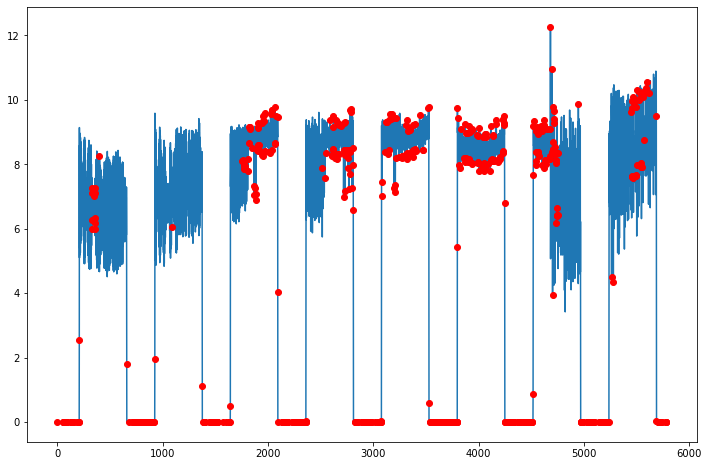

In [21]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after + 720 * 2].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
model = LOF(n_neighbors=12) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


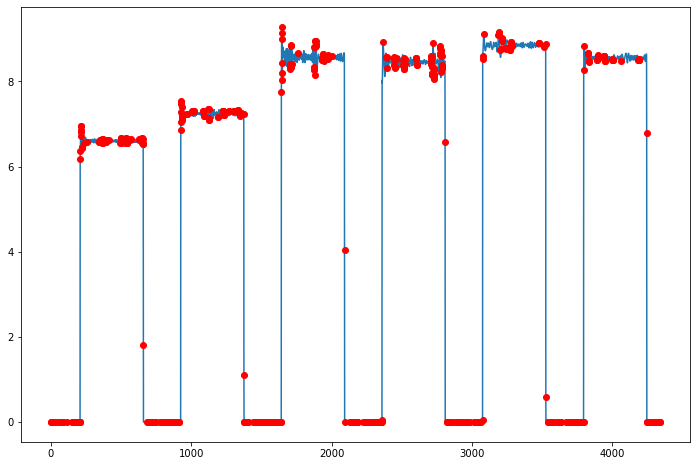

In [22]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

### Суточные данные, одна размерность, без EMD 
Трейн на всех

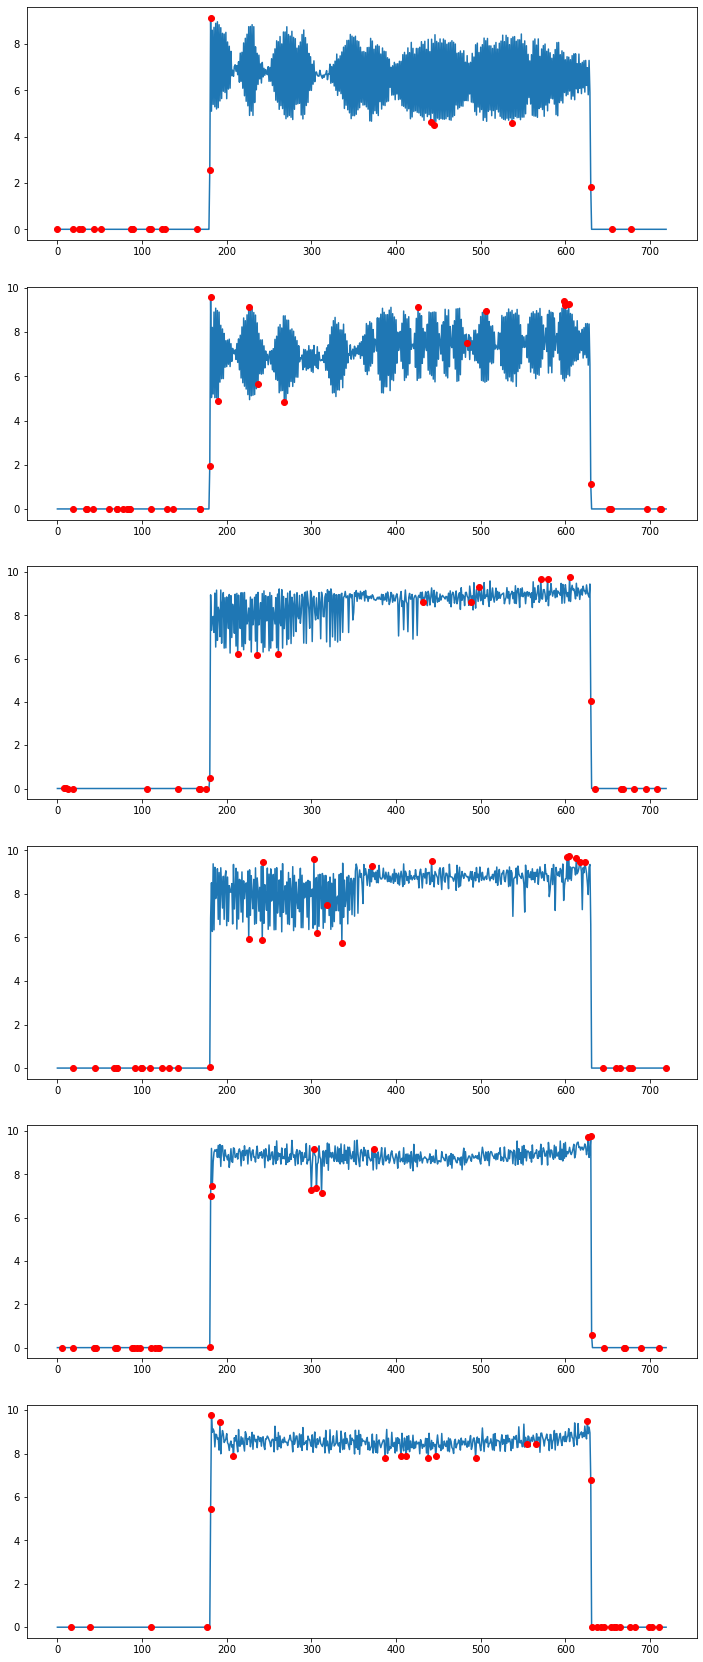

In [23]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  


fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    preds = model.fit_predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day, zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red', zorder=1)
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


(6, 720)


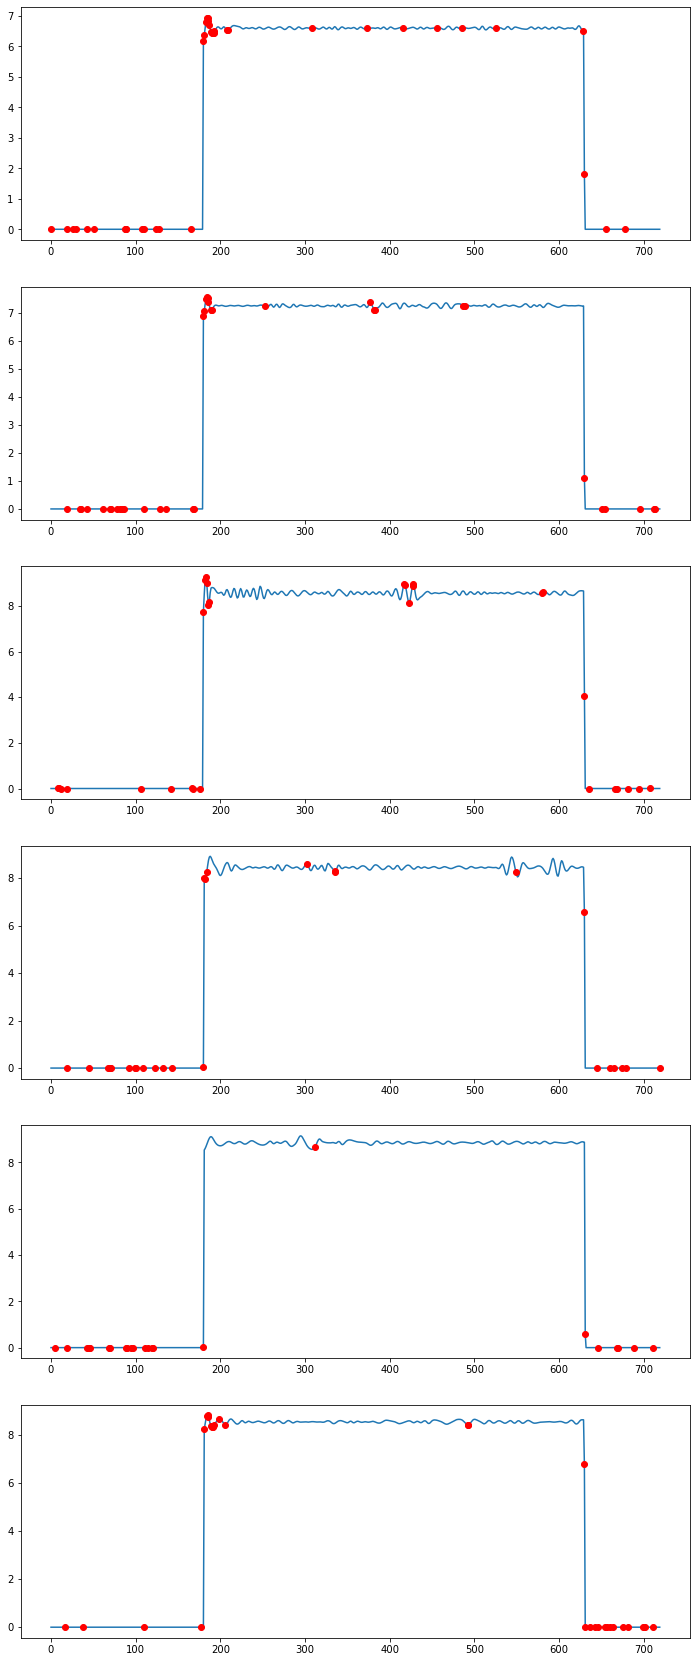

In [24]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day, zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red', zorder=1)
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(7, 720, 5)


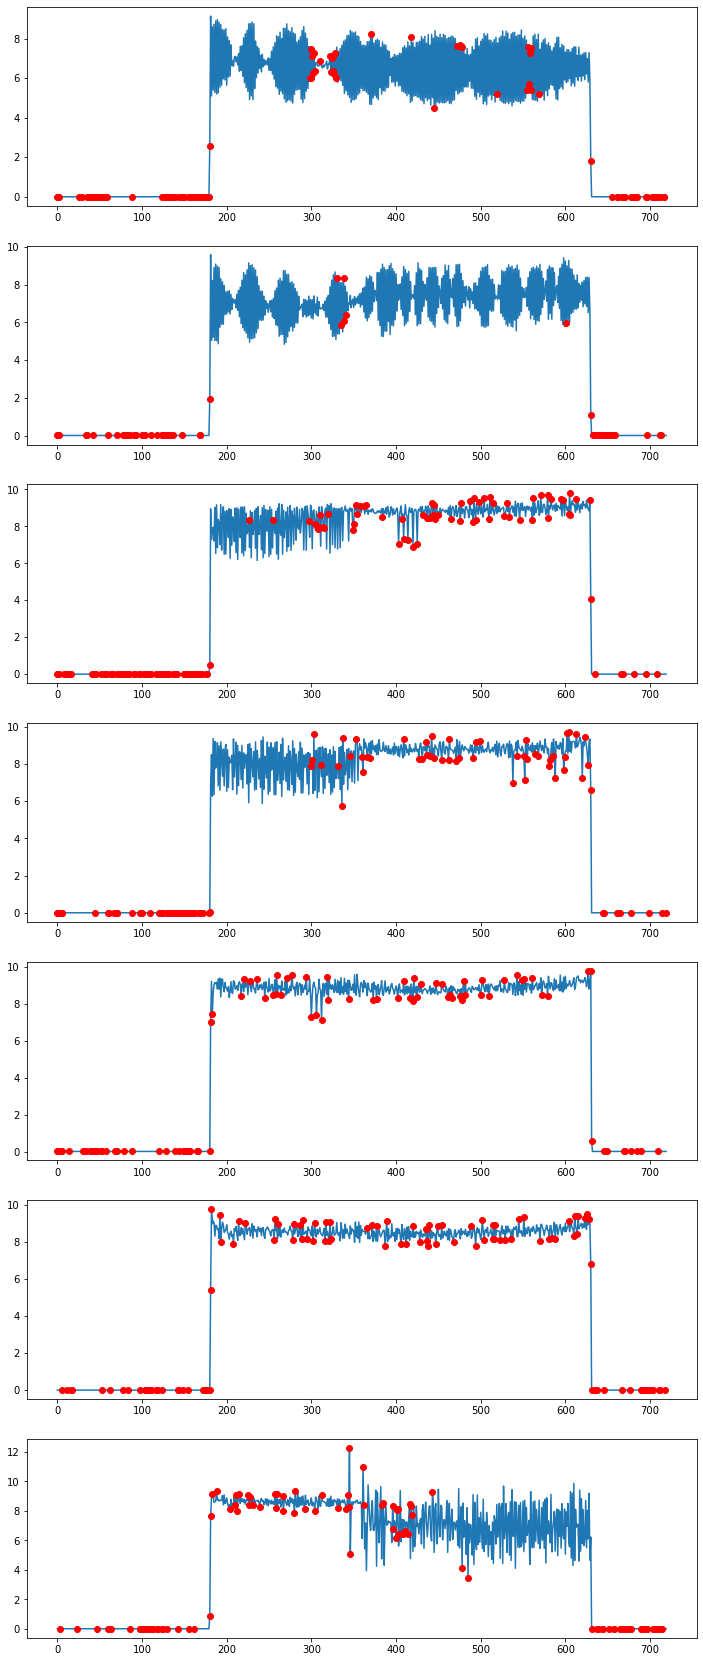

In [26]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after + 720].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day)

    ax[i].plot(np.arange(len(day)), day[:, 0], zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red', zorder=1)
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

739
0 739
195 639 0
1459
739 1459
915 1370 1
2178
1459 2178
1635 2059 2
2897
2178 2897
2394 2803 3
3617
2897 3617
3074 3509 4
(5, 720, 5)


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


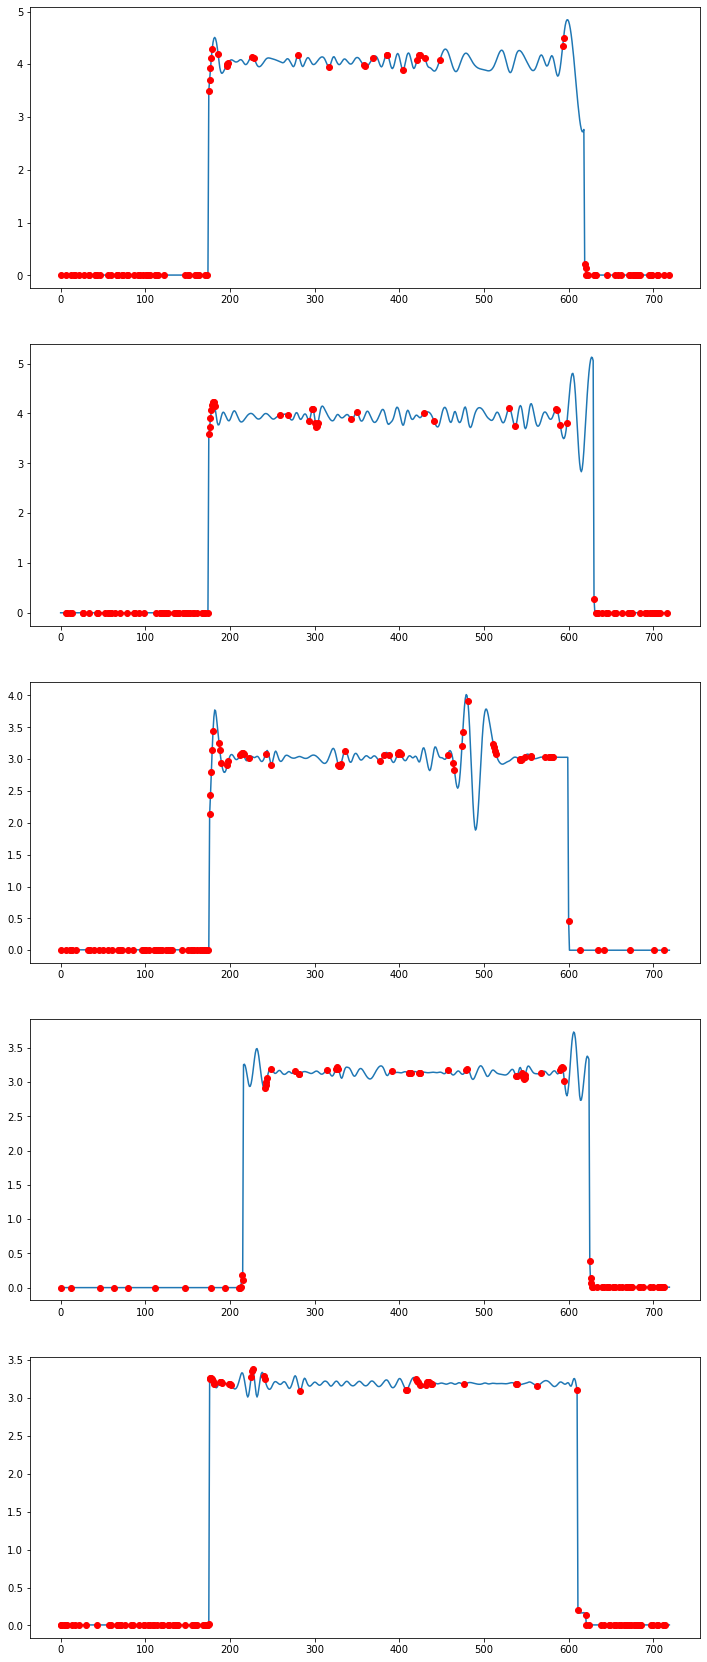

In [53]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))

model = LOF(n_neighbors=n_neigh)  

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day)
    ax[i].plot(np.arange(len(day)), day[:, 0], zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red', zorder=1)
    i += 1

In [ ]:
### Оригинальные данные, бинарная мульти размерность, no EMD (интервал 2)
Трейн на норм

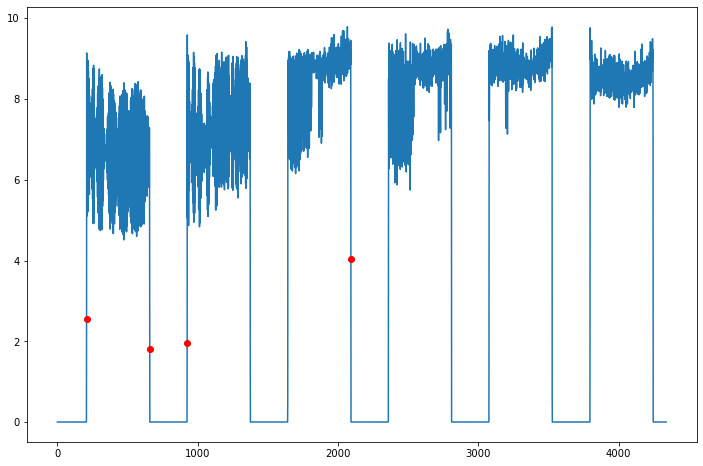

In [6]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=2)[1:]
ocsvm = LOF(n_neighbors=20)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, no EMD (интервал 5)
Трейн на норм

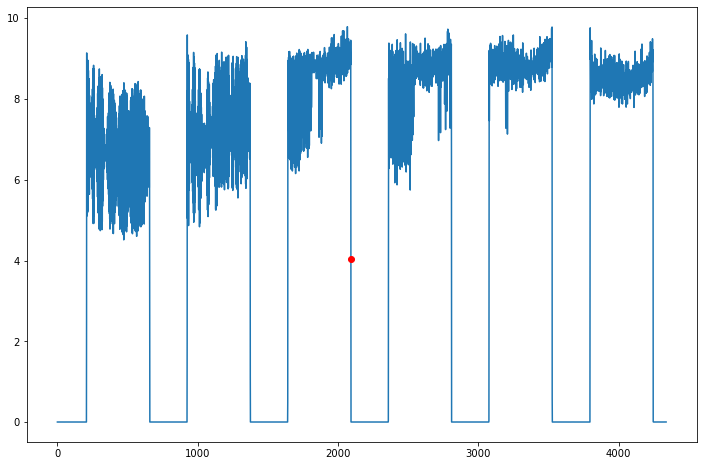

In [7]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=5)[1:]
ocsvm = LOF(n_neighbors=5)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, no EMD (интервал 15)
Трейн на норм

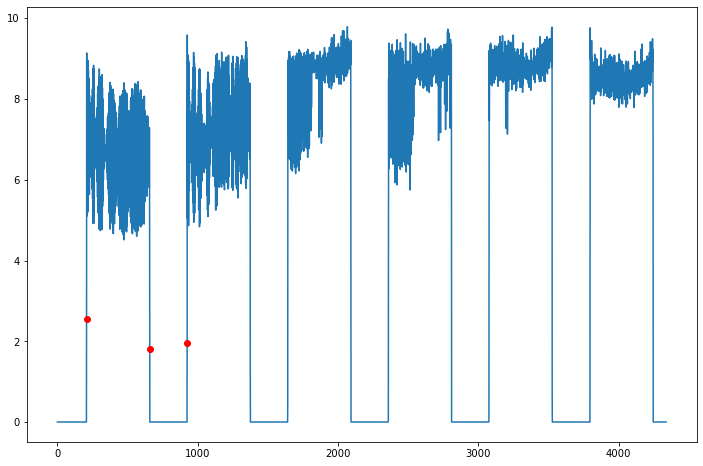

In [14]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=15)[1:]
ocsvm = LOF(n_neighbors=70)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 2)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


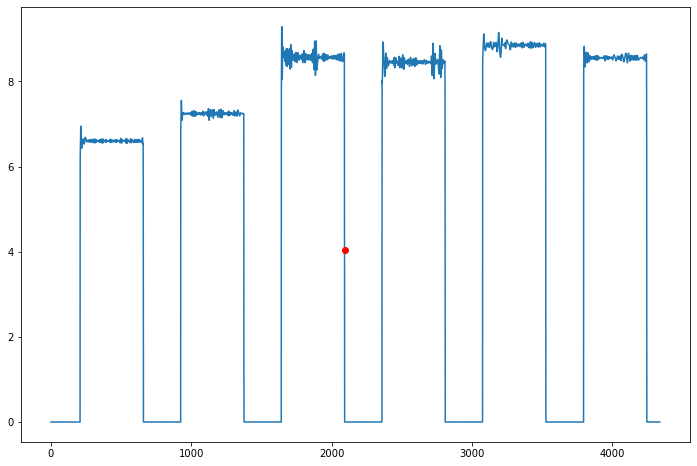

In [10]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=2)[1:]
ocsvm = LOF(n_neighbors=5)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 5)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


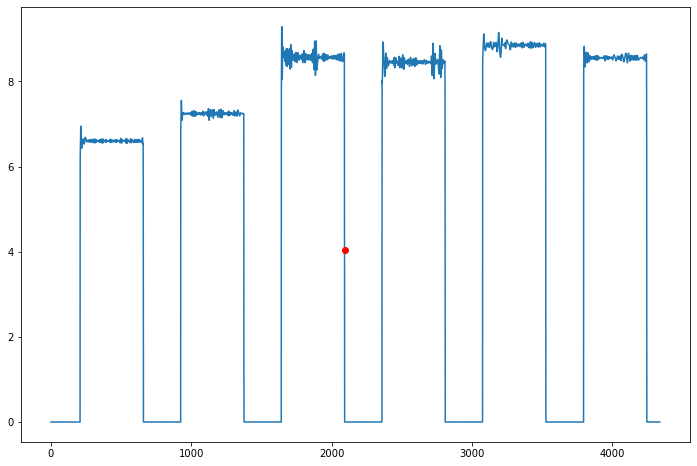

In [11]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=5)[1:]
ocsvm = LOF(n_neighbors=5)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 15)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


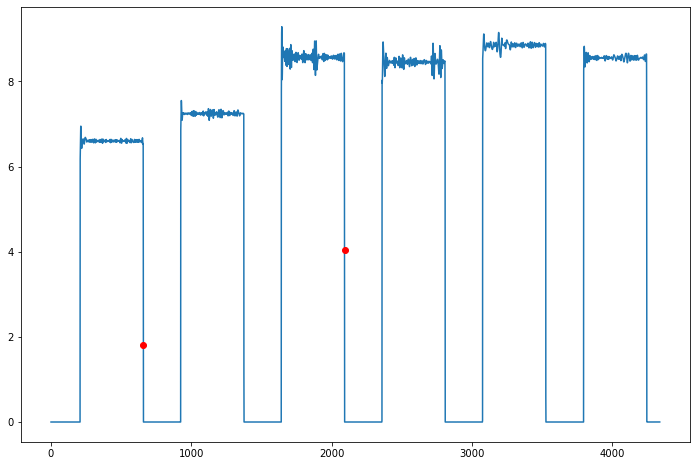

In [13]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=15)[1:]
ocsvm = LOF(n_neighbors=50)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 2)
Трейн на норм

[  31  748 1465 2182 2899 3616 4336]
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
720
[1 1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (6). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


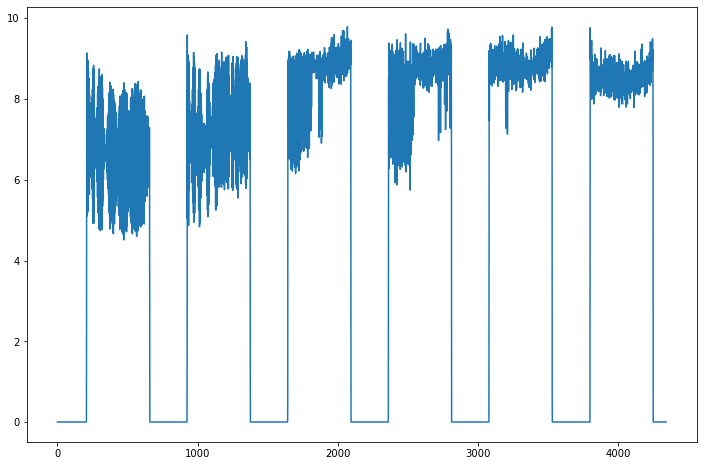

In [4]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=2)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 5)
Трейн на норм

[  31  748 1465 2182 2899 3616 4336]
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
720
[1 1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (6). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


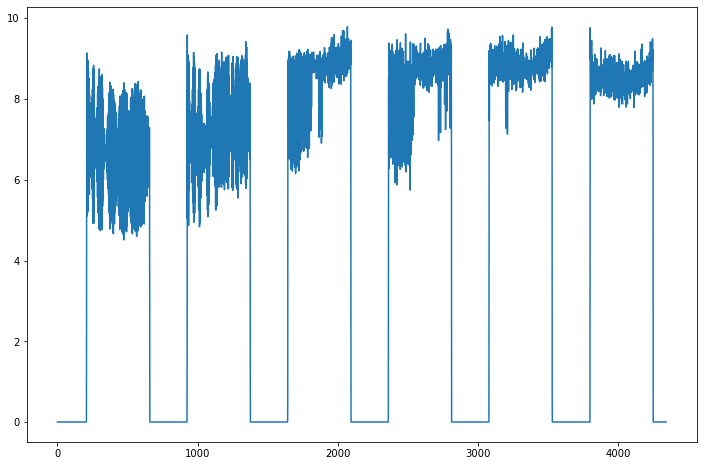

In [5]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=5)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 15)
Трейн на норм

[  31  748 1465 2182 2899 3616 4336]
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
720
[1 1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (6). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


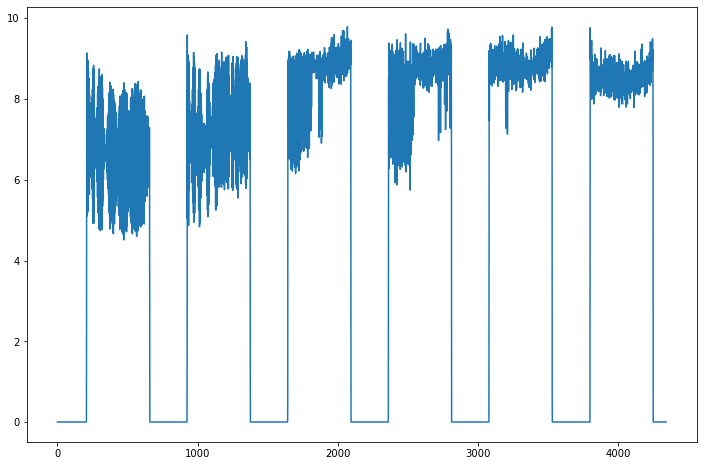

In [6]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 2)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[  31  748 1465 2182 2899 3616 4336]
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
720
[1 1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (6). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "
/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


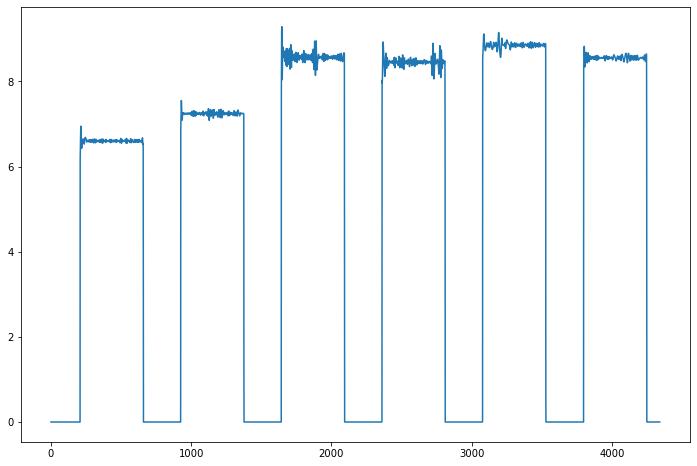

In [7]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=2)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 5)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[  31  748 1465 2182 2899 3616 4336]
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
720
[1 1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (6). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "
/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


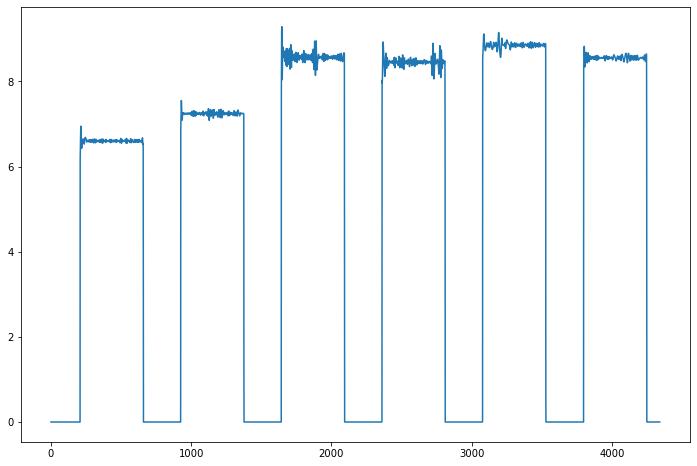

In [8]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=5)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 15)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[  31  748 1465 2182 2899 3616 4336]
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
SMALL
4341
720
720
[1 1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (6). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "
/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


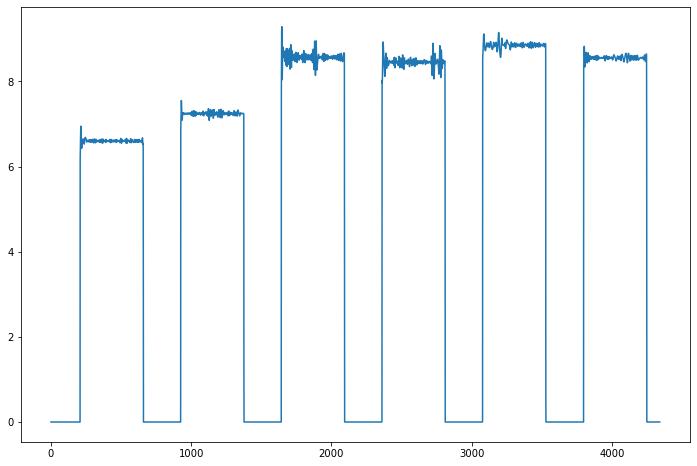

In [9]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=15)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')